## Meta tau

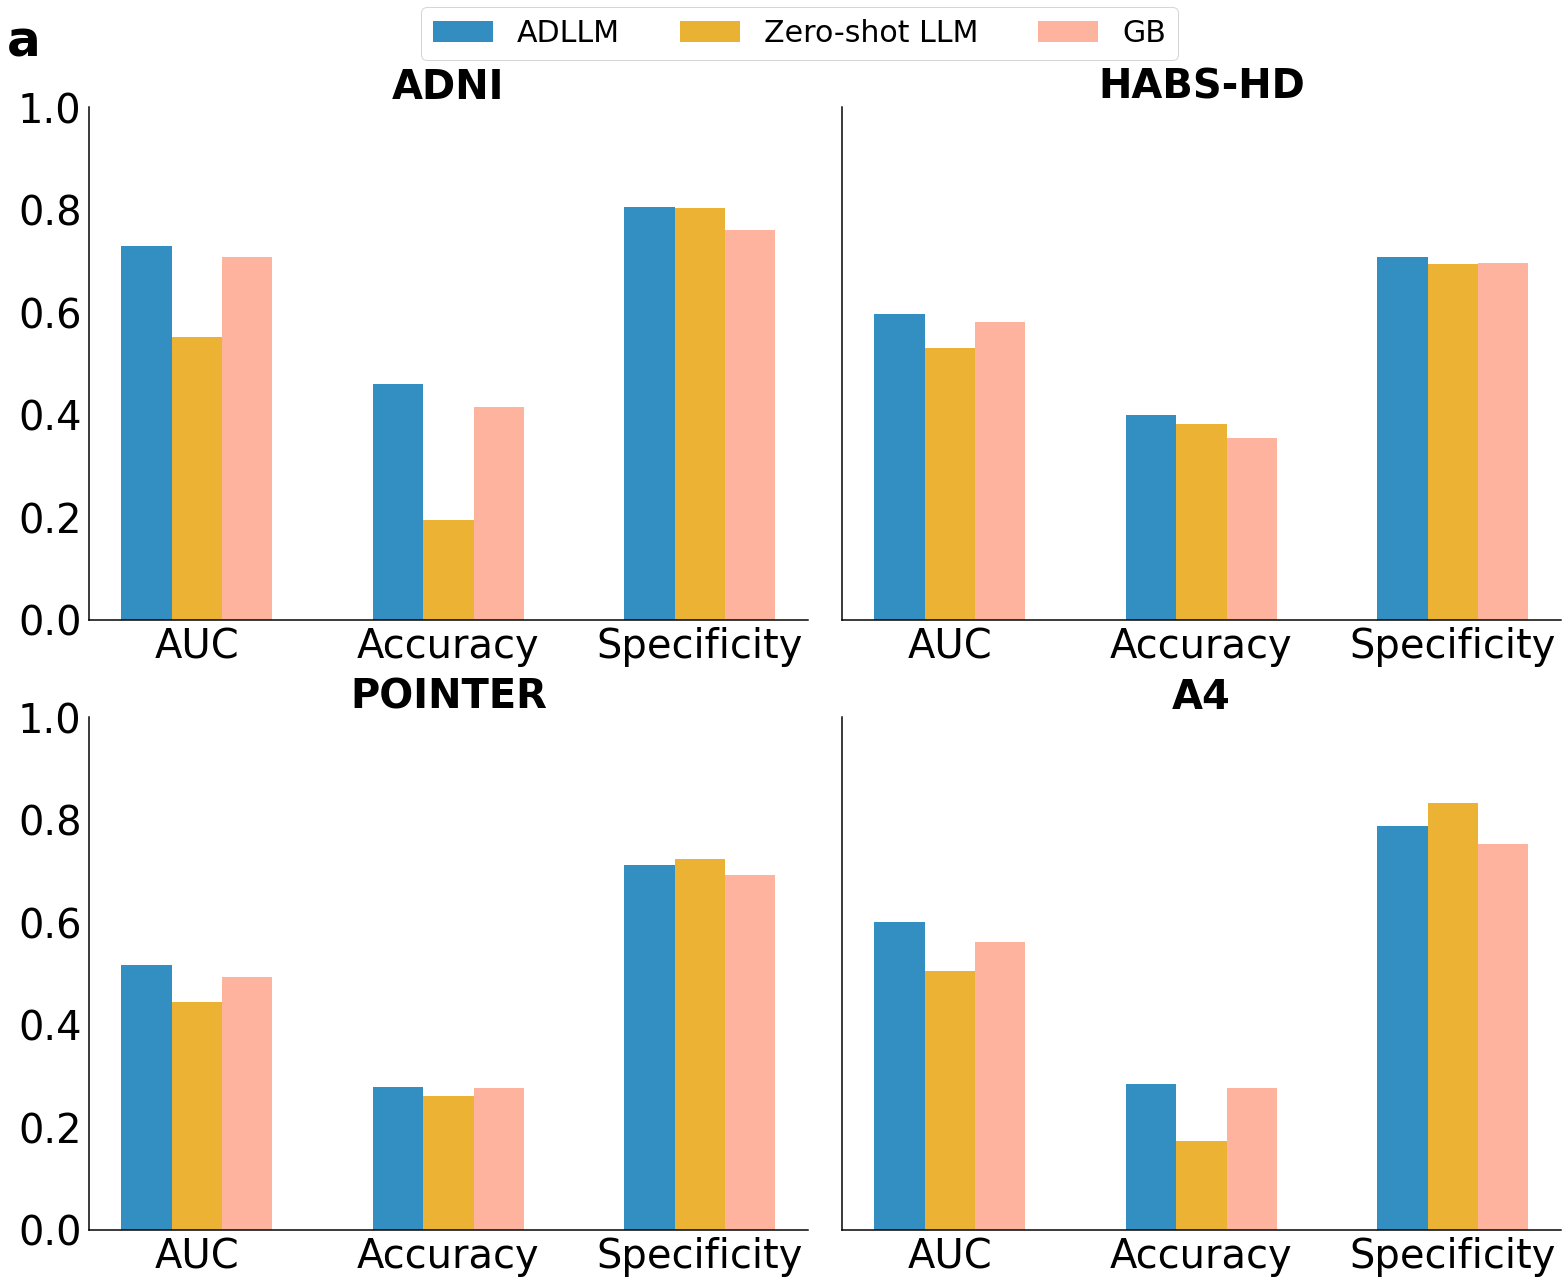

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Define x positions for TN and Correlation
x = np.arange(2)  # For TN and Correlation

# Redefine the data to ensure consistency across cohorts
# llm_two_class = {
#     "ADNI": [0.805, 0.729],
#     "HABS-HD": [0.749, 0.793],
#     "POINTER": [0.678, 0.738],
#     "A4": [0.720, 0.573]
# }

# llm_four_class = {
#     "ADNI": [ 0.720,  0.450, 0.450, 0.836, 0.659],
#     "HABS-HD": [0.525,  0.254,0.254, 0.772, 0.236],
#     "POINTER": [  0.493, 0.322, 0.322,0.727,0.168 ],
#     "A4": [0.581, 0.275,0.275,0.813, 0.246 ]
# }

llm_four_class = {
    "ADNI": [ 0.730,  0.460,  0.806],
    "HABS-HD": [0.597,  0.399, 0.708],
    "POINTER": [  0.516, 0.278, 0.711 ],
    "A4": [0.600, 0.284, 0.789 ]
}
llm_zero_shot={
    "ADNI": [ 0.551,  0.194,  0.803],
    "HABS-HD": [0.530,  0.381, 0.694],
    "POINTER": [  0.445, 0.261, 0.724 ],
    "A4": [0.505, 0.173, 0.832 ]
}
gb_four_class = {
    "ADNI": [ 0.707, 0.414,0.761 ],
    "HABS-HD": [0.580, 0.354,0.695],
    "POINTER": [  0.494,0.276,0.693],
    "A4": [   0.561,0.277,0.752]
}

# Colors for each model
colors = [
    (0/255, 114/255, 178/255), #dark blue for LLM four-class
    (254/255, 160/255, 135/255), #yellow for GB four-class
    (86/255, 180/255, 233/255),  # Light blue for LLM Four-Class
    (230/255, 159/255, 0/255),   # Orange for GB Four-Class
    (254/255, 160/255, 135/255), # Light red for LLM Four-Class No Blood
    (206/255, 106/255, 73/255)   # Dark red for LLM Four-Class with Blood
]

# Metric labels for x-axis
metric_labels = ["AUC", "Accuracy", "Specificity"]
x = np.arange(len(metric_labels))  # label locations
width = 0.3 # width of bars


# Plotting setup for 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(22, 18), sharey=True)

# Style function for cleaner look
def apply_style(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    ax.xaxis.set_tick_params(width=0,labelsize=40)
    ax.yaxis.set_tick_params(width=0,labelsize=40)
    ax.set_ylim(0, 1.0)

# Plotting function for each cohort
def plot_cohort_metrics(ax, cohort_name, metrics_data):
    width = 0.2
    ax.bar(x - width, metrics_data[cohort_name]["llm_four_class"], width, label="ADLLM", color=colors[0], alpha=0.8)
  #ax.bar(x - width, metrics_data[cohort_name]["llm_two_class"], width, label="ADLLM Two-Class", color=colors[1], alpha=0.8)
    ax.bar(x, metrics_data[cohort_name]["llm_zero_shot"], width, label="Zero-shot LLM", color=colors[3], alpha=0.8)
    # ax.bar(x , metrics_data[cohort_name]["llm_four_class_without_blood"], width, label="ADLLM Four-Class No CSF/Blood Biomarkers", color=colors[2], alpha=0.8)
    ax.bar(x+width, metrics_data[cohort_name]["gb_four_class"], width, label="GB", color=colors[1], alpha=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(metric_labels, fontsize=40)
    ax.set_title(cohort_name, fontsize=40, weight='bold')
    apply_style(ax)

# Prepare data structure to iterate over cohorts and models
metrics_data = {
    "ADNI": {
#         "llm_two_class": llm_two_class["ADNI"],
        "llm_four_class": llm_four_class["ADNI"],
        "llm_zero_shot":llm_zero_shot["ADNI"],
        # "llm_four_class_blood": llm_four_class_blood["ADNI"],
        # "llm_four_class_without_blood": llm_four_class_without_blood["ADNI"],
        "gb_four_class": gb_four_class["ADNI"]
    },
    "HABS-HD": {
#         "llm_two_class": llm_two_class["HABS-HD"],
        "llm_four_class": llm_four_class["HABS-HD"],
        "llm_zero_shot":llm_zero_shot["HABS-HD"],
        # "llm_four_class_blood": llm_four_class_blood["HABS-HD"],
        # "llm_four_class_without_blood": llm_four_class_without_blood["HABS-HD"],
        "gb_four_class": gb_four_class["HABS-HD"]
    },
    "POINTER": {
#         "llm_two_class": llm_two_class["POINTER"],
        "llm_four_class": llm_four_class["POINTER"],
        "llm_zero_shot":llm_zero_shot["POINTER"],
        # "llm_four_class_blood": llm_four_class_blood["POINTER"],
        # "llm_four_class_without_blood": llm_four_class_without_blood["POINTER"],
        "gb_four_class": gb_four_class["POINTER"]
    },
    "A4": {
#         "llm_two_class": llm_two_class["A4"],
        "llm_four_class": llm_four_class["A4"],
        "llm_zero_shot":llm_zero_shot["A4"],
        # "llm_four_class_blood": llm_four_class_blood["A4"],
        # "llm_four_class_without_blood": llm_four_class_without_blood["A4"],
        "gb_four_class": gb_four_class["A4"]
    }
}

# Plotting for each cohort
plot_cohort_metrics(axes[0, 0], "ADNI", metrics_data)
plot_cohort_metrics(axes[0, 1], "HABS-HD", metrics_data)
plot_cohort_metrics(axes[1, 0], "POINTER", metrics_data)
plot_cohort_metrics(axes[1, 1], "A4", metrics_data)

# Adding a common legend at the top
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=30)
fig.text(0.0, 0.98, "a", fontsize=50, fontweight='bold', ha='left', va='top')
# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("D:\Research\AD\ADLLM\ADNI process 9\\Result_visualization\\meta_tau_ver2.svg", format="svg")
plt.savefig("D:\Research\AD\ADLLM\ADNI process 9\\Result_visualization\\meta_tau_ver2.png", format="png")
plt.show()


## Abeta burden

In [17]:
import matplotlib.pyplot as plt
import numpy as np



llm_four_class = {
    "ADNI": [0.825, 0.685, 0.770 ],
    "HABS-HD": [ 0.773, 0.812 , 0.290],
    "POINTER": [0.702,  0.734,0.285 ],
    "A4": [0.610, 0.256, 0.837 ]
}
llm_zero_shot= {
    "ADNI": [  0.753, 0.554,0.741],
    "HABS-HD": [ 0.658,0.735,0.346],
    "POINTER": [ 0.631, 0.644,0.423 ],
    "A4": [0.591 , 0.173, 0.843]
}
gb_four_class = {
    "ADNI": [0.825, 0.689,0.729],
    "HABS-HD": [ 0.746, 0.8261, 0.174],
    "POINTER": [0.664, 0.750, 0.250],
    "A4": [0.609,0.204, 0.852]
}



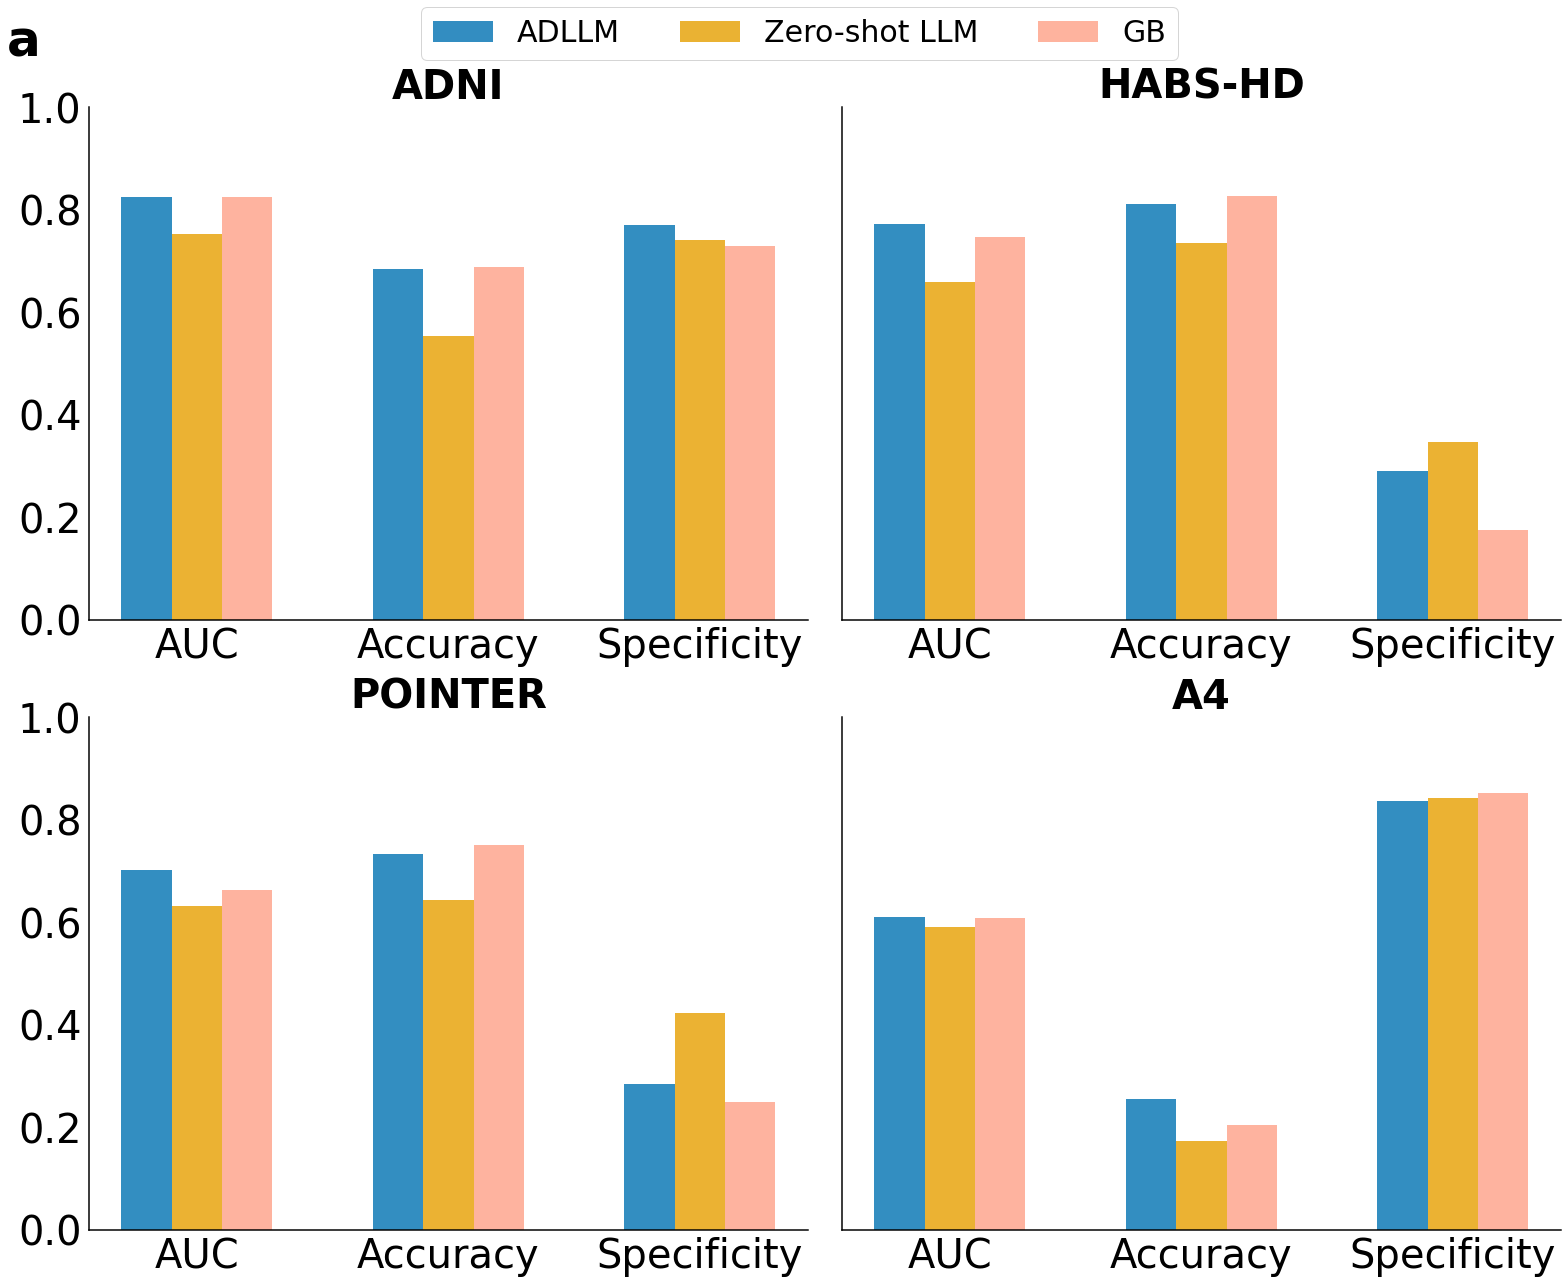

In [18]:
# llm_four_class_noblood = llm_four_class_without_blood  # Reassign for clarity in naming
# llm_four_class_blood_fixed=llm_four_class_blood
# Plotting setup for AUC, Accuracy, Sensitivity, Specificity with all 6 models
import matplotlib.ticker as mticker

# Revised plotting of the figure based on updated requirements

# Re-define the data and parameters for the revised setup (5 configurations, excluding GB Two-Class)
fig, axes = plt.subplots(2, 2, figsize=(22, 18), sharey=True)
#fig.suptitle('Metric Comparison by Cohort for Different Models for Abeta Prediction', 
 #            fontsize=16, weight='bold')

def apply_style(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    ax.xaxis.set_tick_params(width=0,labelsize=40)
    ax.yaxis.set_tick_params(width=0,labelsize=40)
    ax.set_ylim(0, 1.0)

# Function to plot metrics with applied style
def plot_cohort_three_models(ax, cohort_name, metrics_llm_four, metrics_llm_zero, 
                        metrics_gb_four):
    width = 0.2  # Adjusted width for five models
  
    ax.bar(x- 1*width , metrics_llm_four, width, label="ADLLM", color=(0/255, 114/255, 178/255), alpha=0.8)
    ax.bar(x, metrics_llm_zero, width, label="Zero-shot LLM", color=(230/255, 159/255, 0/255), alpha=0.8)
    ax.bar(x+1*width , metrics_gb_four, width, label="GB", color=(254/255, 160/255, 135/255), alpha=0.8)
   
  #  ax.bar(x+ 2*width, metrics_llm_blood, width, label="ADLLM Four-Class with CSF/Blood Biomarkers", color=(206/255, 106/255, 73/255), alpha=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(metric_labels, fontsize=40)
    ax.set_title(cohort_name, fontsize=40, weight='bold')
    apply_style(ax)  # Apply the custom style

# Plot each cohort with five models
plot_cohort_three_models(axes[0, 0], "ADNI", llm_four_class["ADNI"], llm_zero_shot["ADNI"], 
                     gb_four_class["ADNI"])

plot_cohort_three_models(axes[0, 1], "HABS-HD", llm_four_class["HABS-HD"], llm_zero_shot["HABS-HD"], 
                        gb_four_class["HABS-HD"] )

plot_cohort_three_models(axes[1, 0], "POINTER", llm_four_class["POINTER"], llm_zero_shot["POINTER"], 
                         gb_four_class["POINTER"])

plot_cohort_three_models(axes[1, 1], "A4", llm_four_class["A4"], llm_zero_shot["A4"], 
                       gb_four_class["A4"])

# Creating a single-line legend above all subplots
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=30)
fig.text(0.0, 0.98, "a", fontsize=50, fontweight='bold', ha='left', va='top')
# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("D:\Research\AD\ADLLM\ADNI process 9\\Result_visualization\\abeta_ver2.svg", format="svg")
plt.savefig("D:\Research\AD\ADLLM\ADNI process 9\\Result_visualization\\abeta_ver2.png", format="png")
plt.show()

## mmse burden

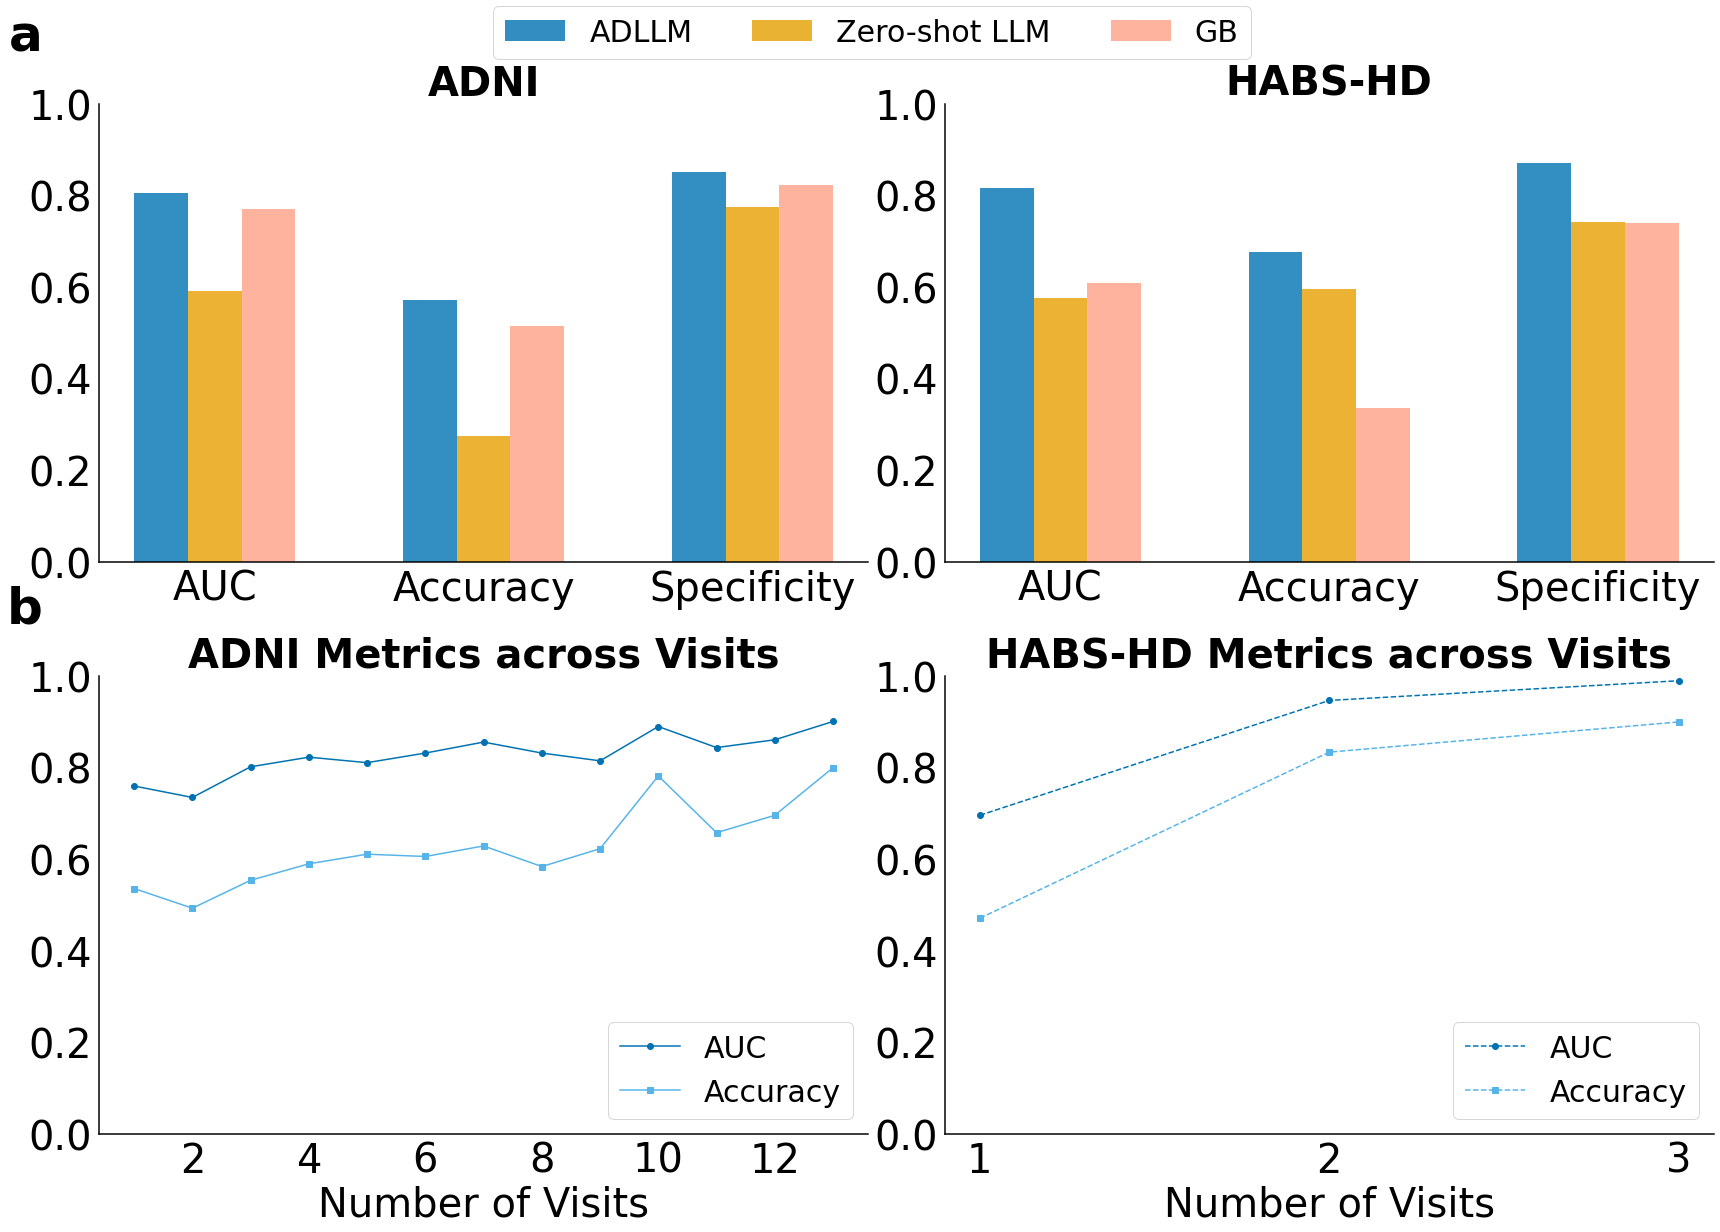

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Define x positions for the metrics
x = np.arange(3)  # For AUC, Accuracy, Sensitivity, Specificity, and Correlation
metric_labels = ["AUC", "Accuracy", "Specificity"]

# Data for the bar plots
# llm_four_class = {
#     "ADNI": [0.789, 0.548, 0.548, 0.850, 0.579],
#     "HABS-HD": [0.837, 0.624, 0.624, 0.828, 0.603]
# }
llm_four_class = {
    "ADNI": [0.806, 0.573,0.851],
    "HABS-HD": [0.816 ,0.677 , 0.872]
}

llm_zero_shot = {
    "ADNI": [0.591,0.274,  0.775 ],
    "HABS-HD": [0.576, 0.597, 0.742]
}

gb_four_class = {
    "ADNI": [0.771, 0.516, 0.824],
    "HABS-HD": [0.610, 0.337,0.741]
}


# Data for the line plots
visit_counts_adni = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
auc_adni = [0.760, 0.735, 0.802, 0.823, 0.811,0.832, 0.856, 0.832, 0.815, 0.890, 0.844,0.861,0.901]
accuracy_adni = [0.536,0.493, 0.554, 0.590, 0.611, 0.606, 0.629, 0.584, 0.623, 0.782, 0.658, 0.696, 0.800]
#sensitivity_adni = accuracy_adni
#specificity_adni = [0.811, 0.830, 0.834, 0.860, 0.853, 0.850, 0.861, 0.842, 0.835, 0.891, 0.860, 0.857, 0.833]

visit_counts_habs = np.array([1, 2, 3])
auc_habs = [0.696, 0.947, 0.990]
accuracy_habs = [0.471,  0.834, 0.900]
#sensitivity_habs = accuracy_habs
#specificity_habs = [0.709, 0.932, 0.922]

# Colors for each model
colors = [
    (0/255, 114/255, 178/255),   # Light blue for LLM Two-Class
    (86/255, 180/255, 233/255),  # Light blue for LLM Four-Class
    (230/255, 159/255, 0/255),   # Orange for GB Four-Class
    (254/255, 160/255, 135/255),# Dark red for GB Two-Class
       (125/255, 22/255, 37/255)
]

# Define the figure and subplots in a 2x2 layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 18))

# Function to style axes
def apply_style(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    ax.xaxis.set_tick_params(width=0,labelsize=40)
    ax.yaxis.set_tick_params(width=0,labelsize=40)
    ax.set_ylim(0, 1.0)

# Plotting the bar chart for ADNI on ax1 (top left)
def plot_bars(ax, cohort_name, colors):
    width = 0.2
    ax.bar(x - 1*width, llm_four_class[cohort_name], width, label="ADLLM", color=colors[0], alpha=0.8)

    ax.bar(x, llm_zero_shot[cohort_name], width, label="Zero-shot LLM", color=colors[2], alpha=0.8)
    ax.bar(x + 1*width, gb_four_class[cohort_name], width, label="GB", color=colors[3], alpha=0.8)
 
    ax.set_xticks(x)
    ax.set_xticklabels(metric_labels, fontsize=20)
    apply_style(ax)

plot_bars(ax1, "ADNI", colors)
ax1.set_title("ADNI", fontsize=40, weight='bold')
ax1.text(-0.073, 1.2, "a", transform=ax1.transAxes, fontsize=50, fontweight='bold', va='top', ha='right')

# Plotting the bar chart for HABS-HD on ax2 (top right)
plot_bars(ax2, "HABS-HD", colors)
ax2.set_title("HABS-HD", fontsize=40, weight='bold')
#ax2.text(-0.1, 1.05, "d", transform=ax2.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Create a common legend for the first row
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), ncol=4, fontsize=30)
from matplotlib.ticker import MaxNLocator

# Set integer ticks for x-axis in visit plots
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))
ax4.xaxis.set_major_locator(MaxNLocator(integer=True))

# Plotting the line plot for ADNI on ax3 (bottom left)
ax3.plot(visit_counts_adni, auc_adni, marker='o', color=colors[0], label='AUC')
ax3.plot(visit_counts_adni, accuracy_adni, marker='s', color=colors[1], label='Accuracy')
#ax3.plot(visit_counts_adni, sensitivity_adni, marker='^', color=colors[2], label='Sensitivity')
#ax3.plot(visit_counts_adni, specificity_adni, marker='d', color=colors[3], label='Specificity')
ax3.set_xlabel("Number of Visits", fontsize=40)
ax3.set_title("ADNI Metrics across Visits", fontsize=40, weight='bold')
ax3.text(-0.073, 1.2, "b", transform=ax3.transAxes, fontsize=50, fontweight='bold', va='top', ha='right')
apply_style(ax3)
ax3.legend(loc="lower right", fontsize=30)

# Plotting the line plot for HABS-HD on ax4 (bottom right)
ax4.plot(visit_counts_habs, auc_habs, marker='o', color=colors[0], linestyle="--", label='AUC')
ax4.plot(visit_counts_habs, accuracy_habs, marker='s', color=colors[1], linestyle="--", label='Accuracy')
#ax4.plot(visit_counts_habs, sensitivity_habs, marker='^', color=colors[2], linestyle="--", label='Sensitivity')
#ax4.plot(visit_counts_habs, specificity_habs, marker='d', color=colors[3], linestyle="--", label='Specificity')
ax4.set_xlabel("Number of Visits", fontsize=40)
ax4.set_title("HABS-HD Metrics across Visits", fontsize=40, weight='bold')
#ax4.text(-0.1, 1.05, "e", transform=ax4.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
apply_style(ax4)
ax4.legend(loc="lower right", fontsize=30)
# Increase these values to add more space
# Adjust layout and show
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.25, wspace=0.1)  
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\combined.png", format="png")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\combined.svg", format="svg")
plt.show()


## TPR ORIGINAL

C:\Users\25110\AppData\Local\Temp/ipykernel_12956/628412528.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], color="gray", size=10)


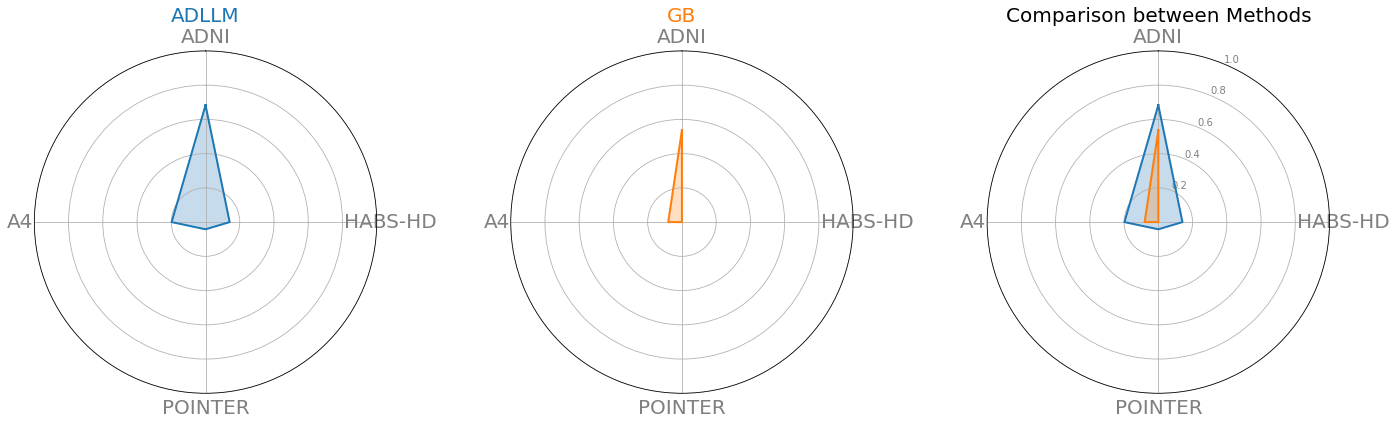

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Data for PPV values by cohort for each method
ppv_data = {
    "ADLLM": [0.683, 0.141, 0.042, 0.198],
    "GB": [0.536, 0.000, 0.000, 0.080],
#     "ADLLM Two-Class No CSF/Blood Biomarkers": [0.779, 0.571, np.nan, np.nan],
#     "ADLLM Two-Class with CSF/Blood Biomarkers": [0.88, 0.214, np.nan, np.nan]
}

# Cohort labels and colors for each method
cohort_labels = ["ADNI", "HABS-HD", "POINTER", "A4"]
method_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
methods = list(ppv_data.keys())

# Number of variables (one per cohort)
num_vars = len(cohort_labels)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Set up the figure with 1 row and 5 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 6), subplot_kw=dict(polar=True))

# Plot individual radar charts for each method
for i, (method, values) in enumerate(ppv_data.items()):
    # Handle missing values by substituting with 0
    filled_values = [v if not np.isnan(v) else 0 for v in values]
    filled_values += filled_values[:1]  # Loop back to start

    # Set up the radar plot for each method
    axs[i].set_theta_offset(pi / 2)
    axs[i].set_theta_direction(-1)
    axs[i].plot(angles, filled_values, color=method_colors[i], linewidth=2, linestyle="solid", label=method)
    axs[i].fill(angles, filled_values, color=method_colors[i], alpha=0.25)

    # Add titles and labels for each subplot
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(cohort_labels, fontsize=20, color="gray")
    axs[i].set_yticklabels([])
    axs[i].set_ylim(0, 1)
    axs[i].set_title(method, fontsize=20, color=method_colors[i])

# Plot combined radar chart in the fifth subplot
axs[2].set_theta_offset(pi / 2)
axs[2].set_theta_direction(-1)

# Draw one axis per cohort and add labels
axs[2].set_xticks(angles[:-1])
axs[2].set_xticklabels(cohort_labels, fontsize=20, color="gray")
axs[2].set_ylim(0, 1)
axs[2].set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], color="gray", size=10)

# Plot all methods on the fifth radar plot
for i, (method, values) in enumerate(ppv_data.items()):
    filled_values = [v if not np.isnan(v) else 0 for v in values]
    filled_values += filled_values[:1]
    axs[2].plot(angles, filled_values, color=method_colors[i], linewidth=2, linestyle="solid", label=method)
    axs[2].fill(angles, filled_values, color=method_colors[i], alpha=0.25)

# Add a legend to the combined radar plot
#axs[4].legend(loc="lower right", bbox_to_anchor=(1.3, 0), title="Methods", fontsize=8)
axs[2].set_title("Comparison between Methods", fontsize=20)

# Adjust layout and display plot
plt.tight_layout()
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\abeta_TPR.svg", format="svg")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\abeta_TPR.png", format="png")
plt.show()


## TPR complete 

C:\Users\25110\AppData\Local\Temp/ipykernel_12956/2965227294.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], color="gray", size=10)


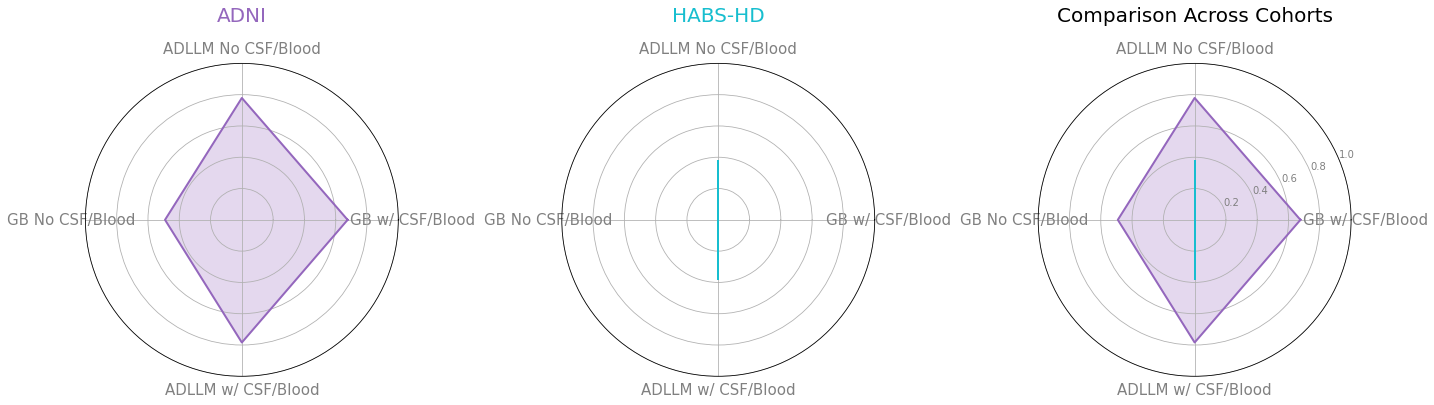

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Data for PPV values by cohort for each method
ppv_data = {
    "ADNI": [0.676,0.779,  0.491,0.784],
    "HABS-HD": [0, 0.375,  0,0.375]
}

# Shortened labels for readability
method_labels = ["GB w/ CSF/Blood","ADLLM No CSF/Blood", "GB No CSF/Blood","ADLLM w/ CSF/Blood" ]
cohort_colors = ["#9467bd", "#17becf"]

# Number of methods
num_methods = len(method_labels)

# Compute angle for each axis (one per method)
angles = [n / float(num_methods) * 2 * pi for n in range(num_methods)]
angles += angles[:1]  # Complete the loop to close the radar chart

# Create a figure with 3 subplots: ADNI, HABS-HD, and combined
fig, axs = plt.subplots(1, 3, figsize=(20, 6), subplot_kw=dict(polar=True))

# Plot for ADNI
values = ppv_data["ADNI"] + ppv_data["ADNI"][:1]  # Loop back to start
axs[0].plot(angles, values, color=cohort_colors[0], linewidth=2, linestyle="solid", label="ADNI")
axs[0].fill(angles, values, color=cohort_colors[0], alpha=0.25)
axs[0].set_title("ADNI", fontsize=20, color=cohort_colors[0], pad=20)
axs[0].set_xticks(angles[:-1])
axs[0].set_xticklabels(method_labels, fontsize=15, color="gray")  # Adjusted font size
#axs[0].set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], color="gray", size=10)
axs[0].set_yticklabels([])
axs[0].set_ylim(0, 1)

# Plot for HABS-HD
values = ppv_data["HABS-HD"] + ppv_data["HABS-HD"][:1]  # Loop back to start
axs[1].plot(angles, values, color=cohort_colors[1], linewidth=2, linestyle="solid", label="HABS-HD")
axs[1].fill(angles, values, color=cohort_colors[1], alpha=0.25)
axs[1].set_title("HABS-HD", fontsize=20, color=cohort_colors[1], pad=20)
axs[1].set_xticks(angles[:-1])
axs[1].set_xticklabels(method_labels, fontsize=15, color="gray")  # Adjusted font size
#axs[1].set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], color="gray", size=10)
axs[1].set_ylim(0, 1)
axs[1].set_yticklabels([])
# Combined plot with both cohorts
for i, (cohort, color) in enumerate(zip(ppv_data.keys(), cohort_colors)):
    values = ppv_data[cohort] + ppv_data[cohort][:1]  # Complete loop for radar
    axs[2].plot(angles, values, color=color, linewidth=2, linestyle="solid", label=cohort)
    axs[2].fill(angles, values, color=color, alpha=0.25)

axs[2].set_title("Comparison Across Cohorts", fontsize=20, color="black", pad=20)
axs[2].set_xticks(angles[:-1])
axs[2].set_xticklabels(method_labels, fontsize=15, color="gray")  # Adjusted font size
axs[2].set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], color="gray", size=10)
axs[2].set_ylim(0, 1)
#axs[2].legend(loc="upper right", bbox_to_anchor=(1.2, 1), fontsize=10)

# Adjust layout and display plot
plt.tight_layout()
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\abeta_TPR_complete.svg", format="svg")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\abeta_TPR_complete.png", format="png")
plt.show()


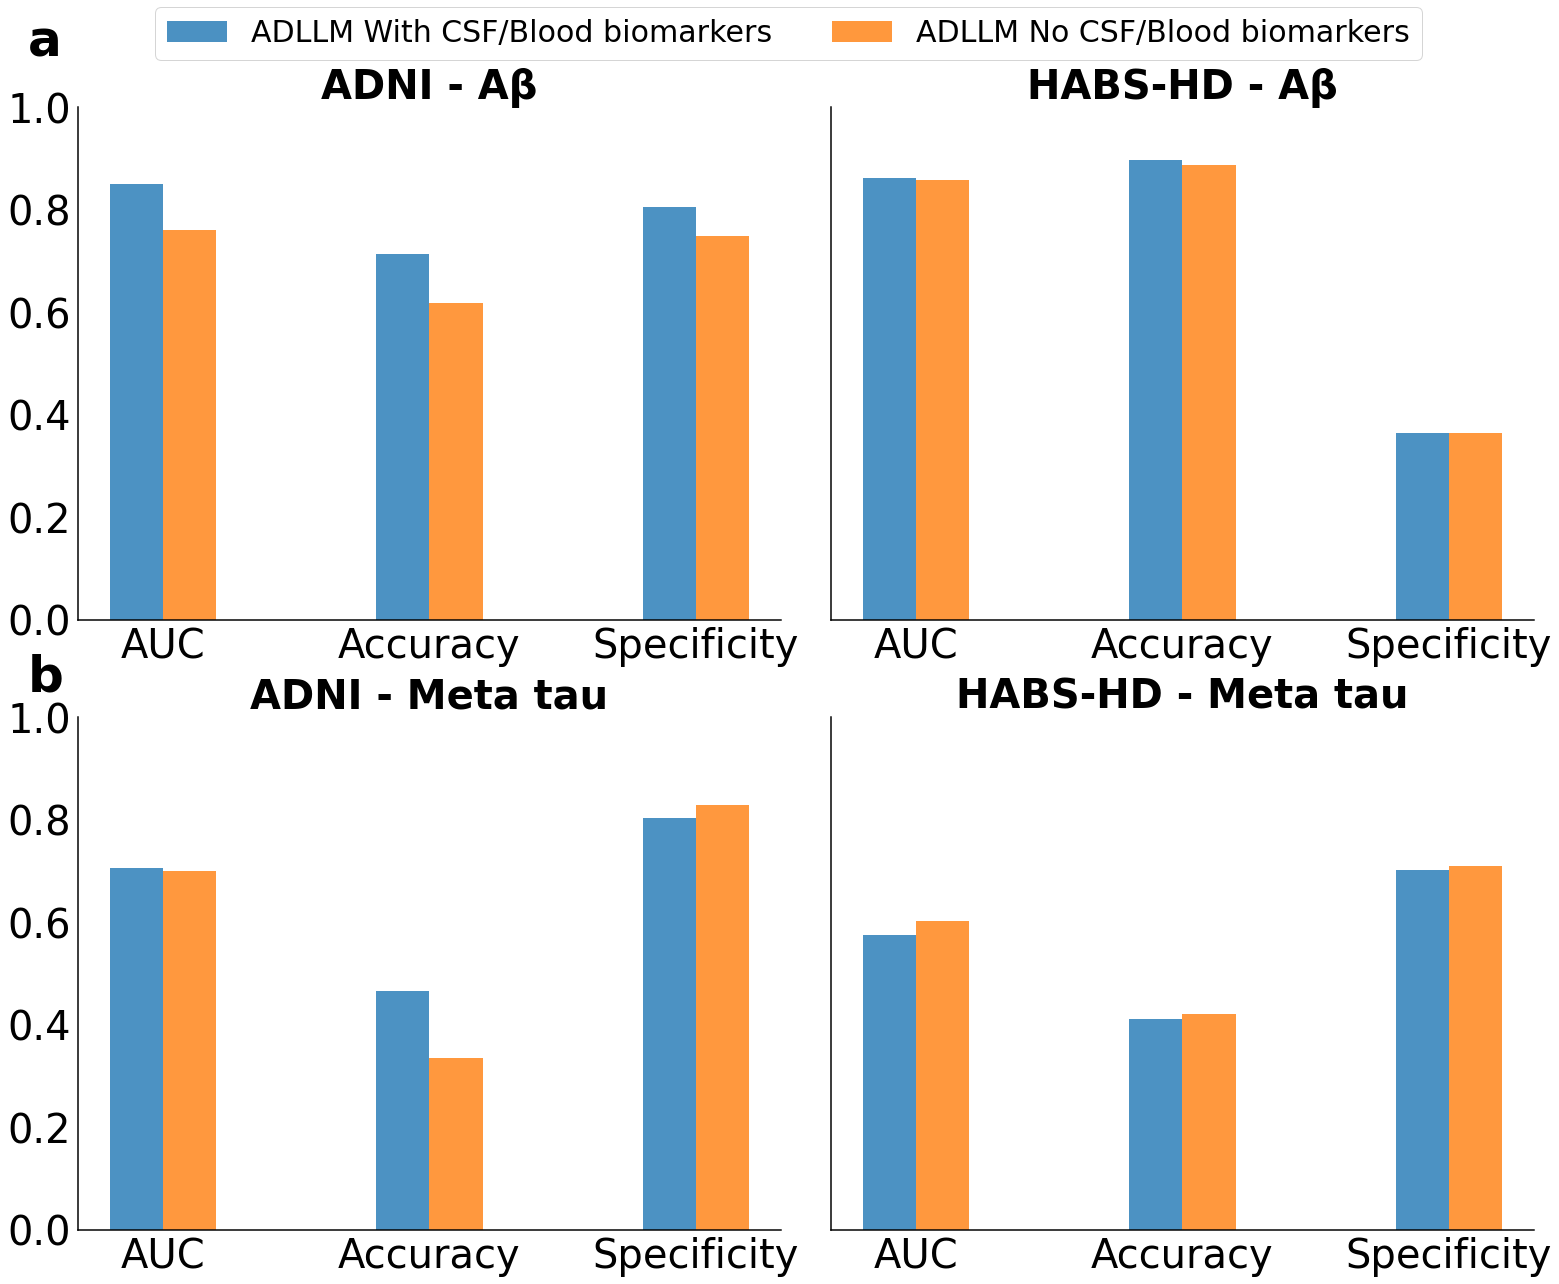

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

# Sample data (replace with your actual data)
llm_with_csf = {'ADNI': {'Aβ': [ 0.851 , 0.713, 0.806], 'Meta tau': [0.707,0.467 ,0.803]},
                'HABS-HD': {'Aβ': [ 0.861, 0.896,  0.365],'Meta tau': [ 0.575, 0.411,0.703]}}
llm_no_csf = {'ADNI': {'Aβ': [0.760,0.618,0.749], 'Meta tau': [0.700,0.336,0.830]},
              'HABS-HD': {'Aβ': [0.857,0.888, 0.364],  'Meta tau': [0.602,0.422, 0.710]}}
# gb_with_csf = {'ADNI': {'Abeta': [0.909, 0.774, 0.774, 0.835, 0.802], 'EC tau': [0,0,0,0,0], 'Meta tau': [0,0,0,0,0]},
#                'HABS-HD': {'Abeta': [0.740,0.864,0.864,0.366, 0.674], 'EC tau': [0.658,0.333,0.333,0.809,0.548], 'Meta tau': [0.596,0.244,0.244,0.793,0.714]}}
# gb_no_csf = {'ADNI': {'Abeta': [0.825, 0.688, 0.688, 0.768, 0.613], 'EC tau': [0,0,0,0,0], 'Meta tau': [0,0,0,0,0]},
#              'HABS-HD': {'Abeta': [0.719,0.848,0.848,0.325,0.624], 'EC tau': [0.632,0.344,0.344,0.818,0.584], 'Meta tau': [0.590,0.288,0.288,0.788,0.711]}}

# Define x positions for bars and metrics
metrics = ['AUC', 'Accuracy', 'Specificity']
x = np.arange(len(metrics))
bar_width = 0.2

# Set up the figure and axes in a 2x2 grid for the required plots
fig, axes = plt.subplots(2, 2, figsize=(22, 18), sharey=True)

# Function to apply style to axes
def apply_style(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    ax.xaxis.set_tick_params(width=0, labelsize=40)
    ax.yaxis.set_tick_params(width=0, labelsize=40)
    ax.set_ylim(0, 1.0)

# Function to plot metrics for each biomarker with four methods
def plot_metrics_for_biomarker(ax, cohort_name, biomarker_name, llm_with, llm_no):
    ax.bar(x - 0.5 * bar_width, llm_with, bar_width, label="ADLLM With CSF/Blood biomarkers", color="#1f77b4", alpha=0.8)
    ax.bar(x + 0.5 * bar_width, llm_no, bar_width, label="ADLLM No CSF/Blood biomarkers", color="#ff7f0e", alpha=0.8)
    # ax.bar(x + 0.5 * bar_width, gb_with, bar_width, label="GB With CSF/Blood", color=(0/255, 114/255, 178/255), alpha=0.8)
    # ax.bar(x + 1.5 * bar_width, gb_no, bar_width, label="GB No CSF/Blood", color=(254/255, 160/255, 135/255), alpha=0.8)

    # Set x-ticks, labels, title, and apply custom style
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, fontsize=40)
    ax.set_title(f'{cohort_name} - {biomarker_name}', fontsize=40, weight='bold')
    apply_style(ax)

# Plot only the required biomarker-cohort combinations
plot_metrics_for_biomarker(
    axes[0, 0], "ADNI", "Aβ", 
    llm_with_csf["ADNI"]["Aβ"], 
    llm_no_csf["ADNI"]["Aβ"]#, 
    # gb_with_csf["ADNI"]["Abeta"], 
    # gb_no_csf["ADNI"]["Abeta"]
)

plot_metrics_for_biomarker(
    axes[0, 1], "HABS-HD", "Aβ", 
    llm_with_csf["HABS-HD"]["Aβ"], 
    llm_no_csf["HABS-HD"]["Aβ"]#, 
    # gb_with_csf["HABS-HD"]["Abeta"], 
    # gb_no_csf["HABS-HD"]["Abeta"]
)

plot_metrics_for_biomarker(
    axes[1, 0], "ADNI", "Meta tau", 
    llm_with_csf["ADNI"]["Meta tau"], 
    llm_no_csf["ADNI"]["Meta tau"]#, 
    # gb_with_csf["HABS-HD"]["EC tau"], 
    # gb_no_csf["HABS-HD"]["EC tau"]
)

plot_metrics_for_biomarker(
    axes[1, 1], "HABS-HD", "Meta tau", 
    llm_with_csf["HABS-HD"]["Meta tau"], 
    llm_no_csf["HABS-HD"]["Meta tau"]#, 
    # gb_with_csf["HABS-HD"]["Meta tau"], 
    # gb_no_csf["HABS-HD"]["Meta tau"]
)

# Creating a single-line legend above all subplots
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, fontsize=30)

# Add subplot labels (optional, adjust as needed)
fig.text(0.02, 0.98, "a", fontsize=50, fontweight='bold', ha='left', va='top')
#fig.text(0.52, 0.98, "b", fontsize=30, fontweight='bold', ha='left', va='top')
fig.text(0.02, 0.49, "b", fontsize=50, fontweight='bold', ha='left', va='top')
#fig.text(0.52, 0.5, "d", fontsize=30, fontweight='bold', ha='left', va='top')

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\complete_abeta_meta_tau.svg", format="svg")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\complete_abeta_meta_tau.png", format="png")
plt.show()


### ROC curve

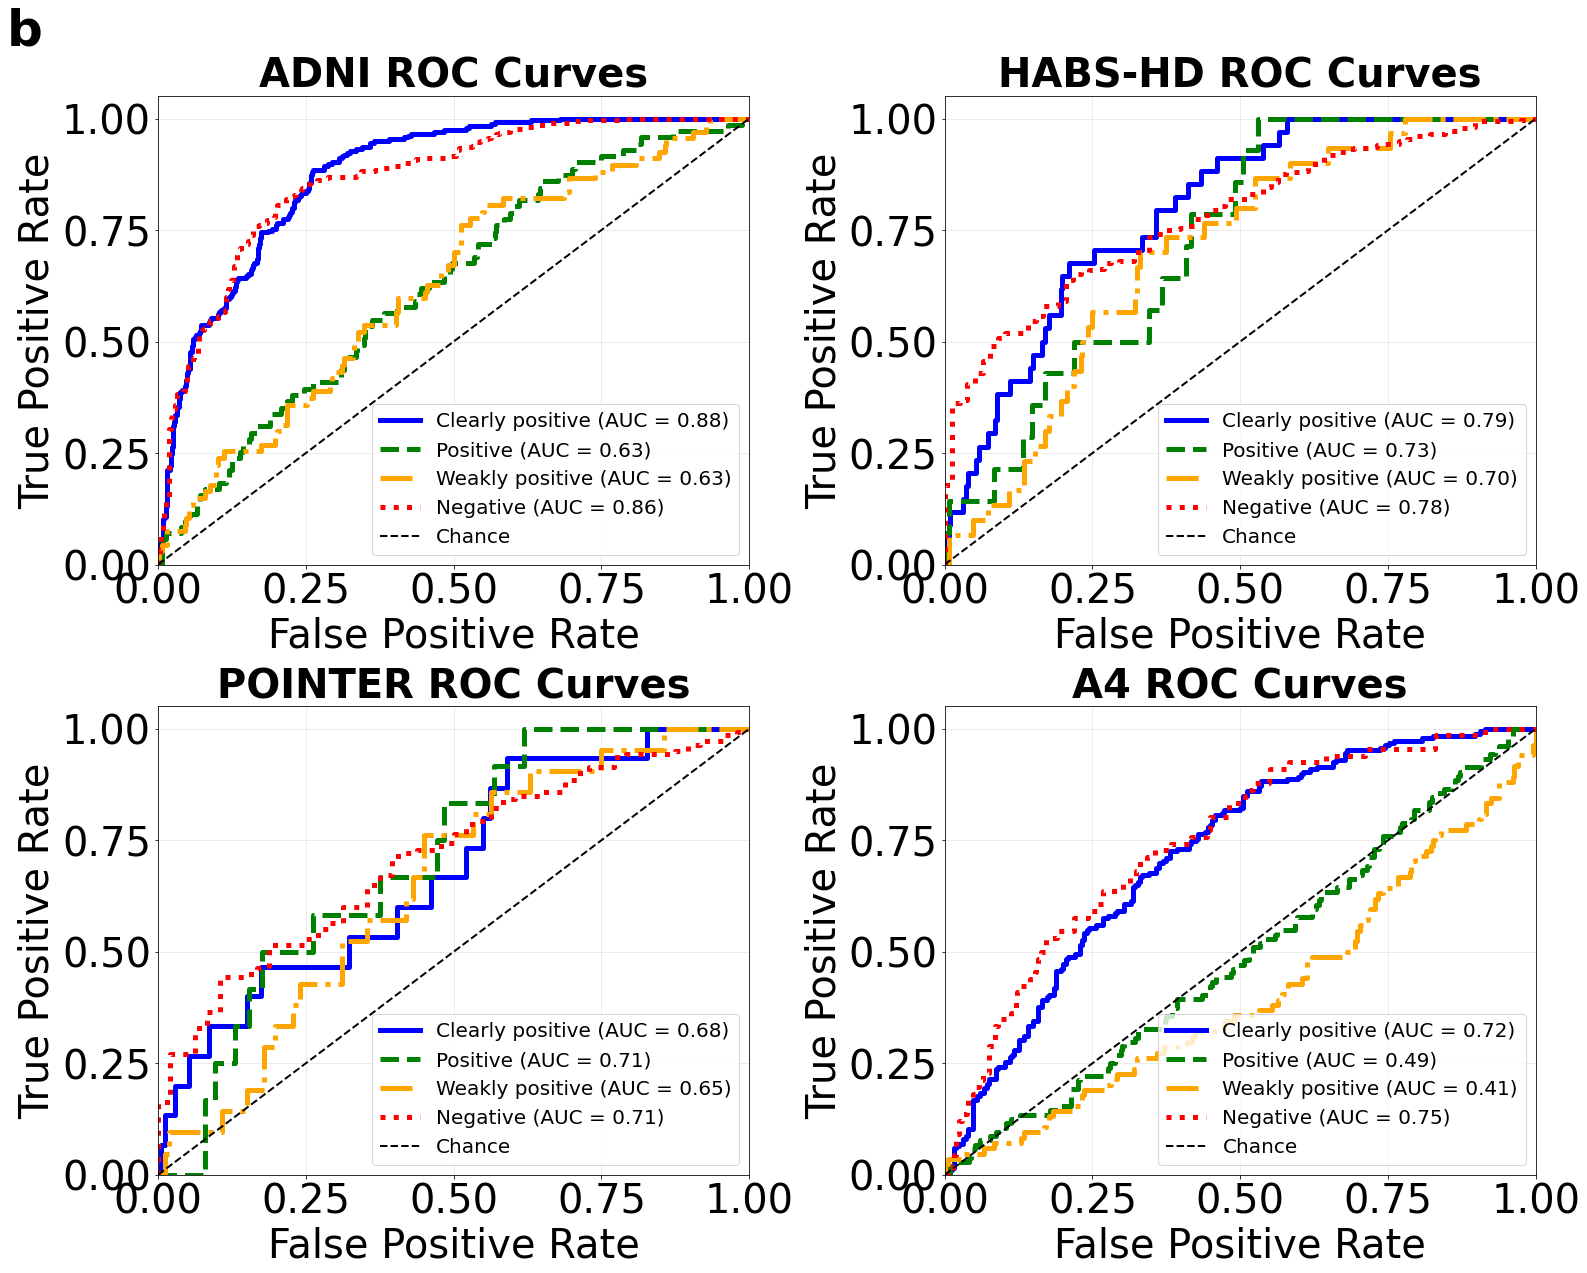

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd

# Define file paths for each cohort
file_paths = {
    "ADNI": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI-results\\ADNI_probability_abeta.csv",
    "HABS-HD":"D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_abeta.csv",
    "POINTER":"D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\POINTER-results\\POINTER_probability_abeta.csv",
    "A4": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\A4-results\\A4_probability_abeta.csv"
}

# Define the classes
classes = ['Abeta-Clearly positive', 'Abeta-Weakly positive', 'Abeta-Intermediate negative', 'Abeta-Negative']

# Colors and line styles for classes
class_colors = ['blue', 'green', 'orange', 'red']
line_styles = ['-', '--', '-.', ':']

# Initialize the subplots
fig, axes = plt.subplots(2, 2, figsize=(22, 18))
axes = axes.flatten()

# Process each cohort
for cohort_idx, (cohort_name, file_path) in enumerate(file_paths.items()):
    ax = axes[cohort_idx]
    
    # Load the dataset
    data = pd.read_csv(file_path)
    data=data[data["Truth"]!="Unknown."]
    data.index=range(data.shape[0])
    # Extract true labels and probabilities
    true_labels = data['Truth']
    class_probs = data[['Abeta-Clearly positive', 'Abeta-Weakly positive', 'Abeta-Intermediate negative', 'Abeta-Negative']]
    
    # Binarize the true labels for one-vs-all classification
    true_labels_binarized = label_binarize(true_labels, classes=['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative'])
    
    # Compute ROC curve and AUC for each class
    for i, class_name in enumerate(['Clearly positive', 'Positive', 'Weakly positive', 'Negative']):
        fpr, tpr, _ = roc_curve(true_labels_binarized[:, i], class_probs[classes[i]])
        roc_auc = auc(fpr, tpr)
        # Plot ROC curve for the class
        ax.plot(
            fpr, tpr,
            label=f'{class_name} (AUC = {roc_auc:.2f})',
            color=class_colors[i],
            linestyle=line_styles[i],
            linewidth=5
        )
    
    # Plot diagonal line for chance
    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
    
    # Set subplot title and labels
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'{cohort_name} ROC Curves', fontsize=40, weight='bold')
    ax.set_xlabel('False Positive Rate', fontsize=40)
    ax.set_ylabel('True Positive Rate', fontsize=40)
    ax.legend(loc='lower right', fontsize=20)
    ax.grid(alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=40)
fig.text(0.0, 0.98, "b", fontsize=50, fontweight='bold', ha='left', va='top')
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\abeta_llm_roc.svg", format="svg")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\abeta_llm_roc.png", format="png")
plt.show()



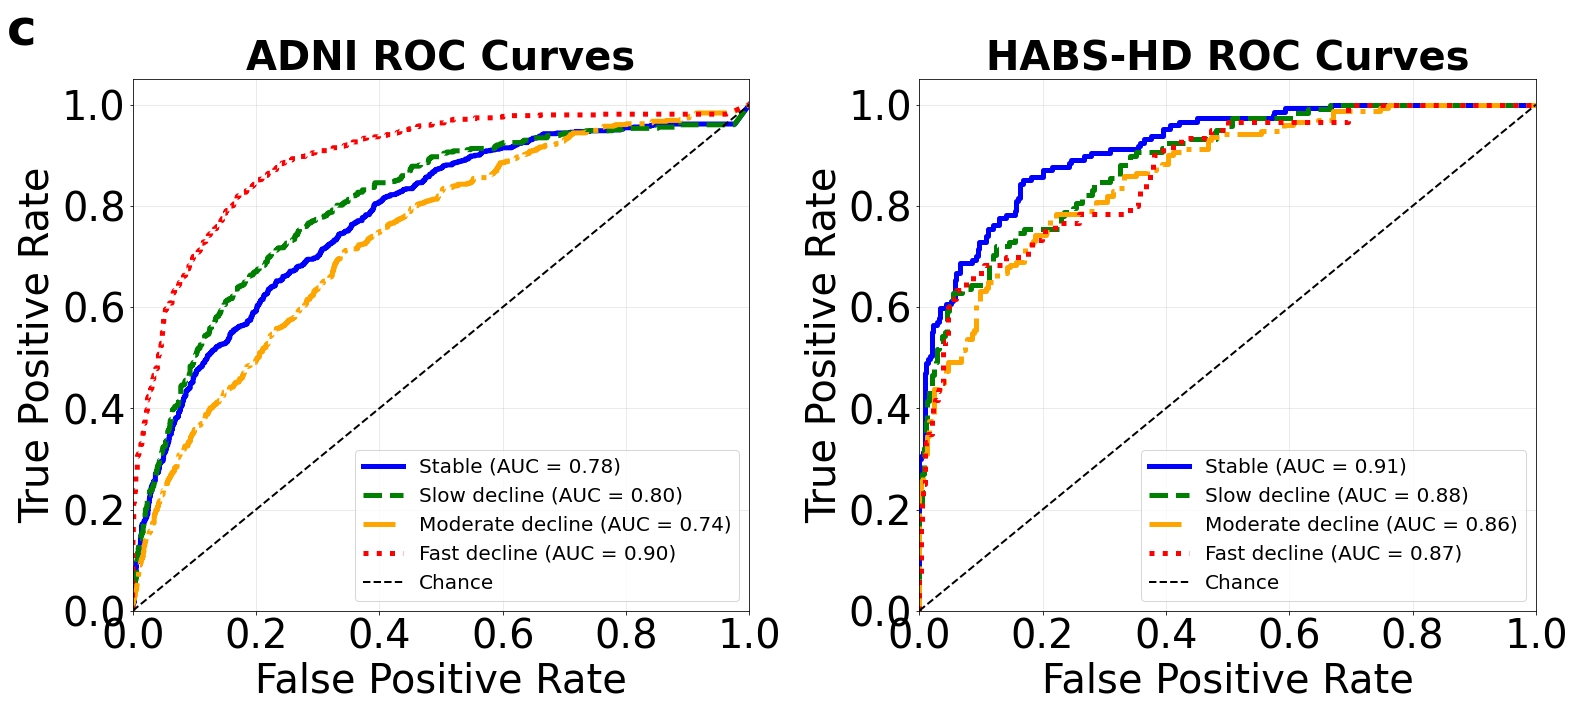

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd

# Define file paths for each cohort
file_paths = {
    "ADNI": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI-results\\ADNI_probability_MMSE.csv",
    "HABS-HD": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_MMSE.csv"
}

# Define the classes
classes = ["MMSE-Not decreasing","MMSE-Slow","MMSE-Moderate","MMSE-Fast"]


# Colors and line styles for classes
class_colors = ['blue', 'green', 'orange', 'red']
line_styles = ['-', '--', '-.', ':']

# Initialize the subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
axes = axes.flatten()

# Process each cohort
for cohort_idx, (cohort_name, file_path) in enumerate(file_paths.items()):
    ax = axes[cohort_idx]
    
    # Load the dataset
    data = pd.read_csv(file_path)
    data=data[data["Truth"]!="Unknown."]
    # Extract true labels and probabilities
    true_labels = data['Truth']
    class_probs = data[["MMSE-Not decreasing","MMSE-Slow","MMSE-Moderate","MMSE-Fast"]]
    
    # Binarize the true labels for one-vs-all classification
    true_labels_binarized = label_binarize(true_labels, classes=["Stable","Slow decline","Moderate decline","Fast decline"])
    
    # Compute ROC curve and AUC for each class
    for i, class_name in enumerate(["Stable","Slow decline","Moderate decline","Fast decline"]):
        fpr, tpr, _ = roc_curve(true_labels_binarized[:, i], class_probs[classes[i]])
        roc_auc = auc(fpr, tpr)
        # Plot ROC curve for the class
        ax.plot(
            fpr, tpr,
            label=f'{class_name} (AUC = {roc_auc:.2f})',
            color=class_colors[i],
            linestyle=line_styles[i],
            linewidth=5
        )
    
    # Plot diagonal line for chance
    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
    
    # Set subplot title and labels
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'{cohort_name} ROC Curves', fontsize=40, weight='bold')
    ax.set_xlabel('False Positive Rate', fontsize=40)
    ax.set_ylabel('True Positive Rate', fontsize=40)
    ax.legend(loc='lower right', fontsize=20)
    ax.grid(alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=40)
fig.text(0.0, 0.98, "c", fontsize=50, fontweight='bold', ha='left', va='top')
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\mmse_llm_roc.svg", format="svg")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\mmse_llm_roc.png", format="png")
plt.show()



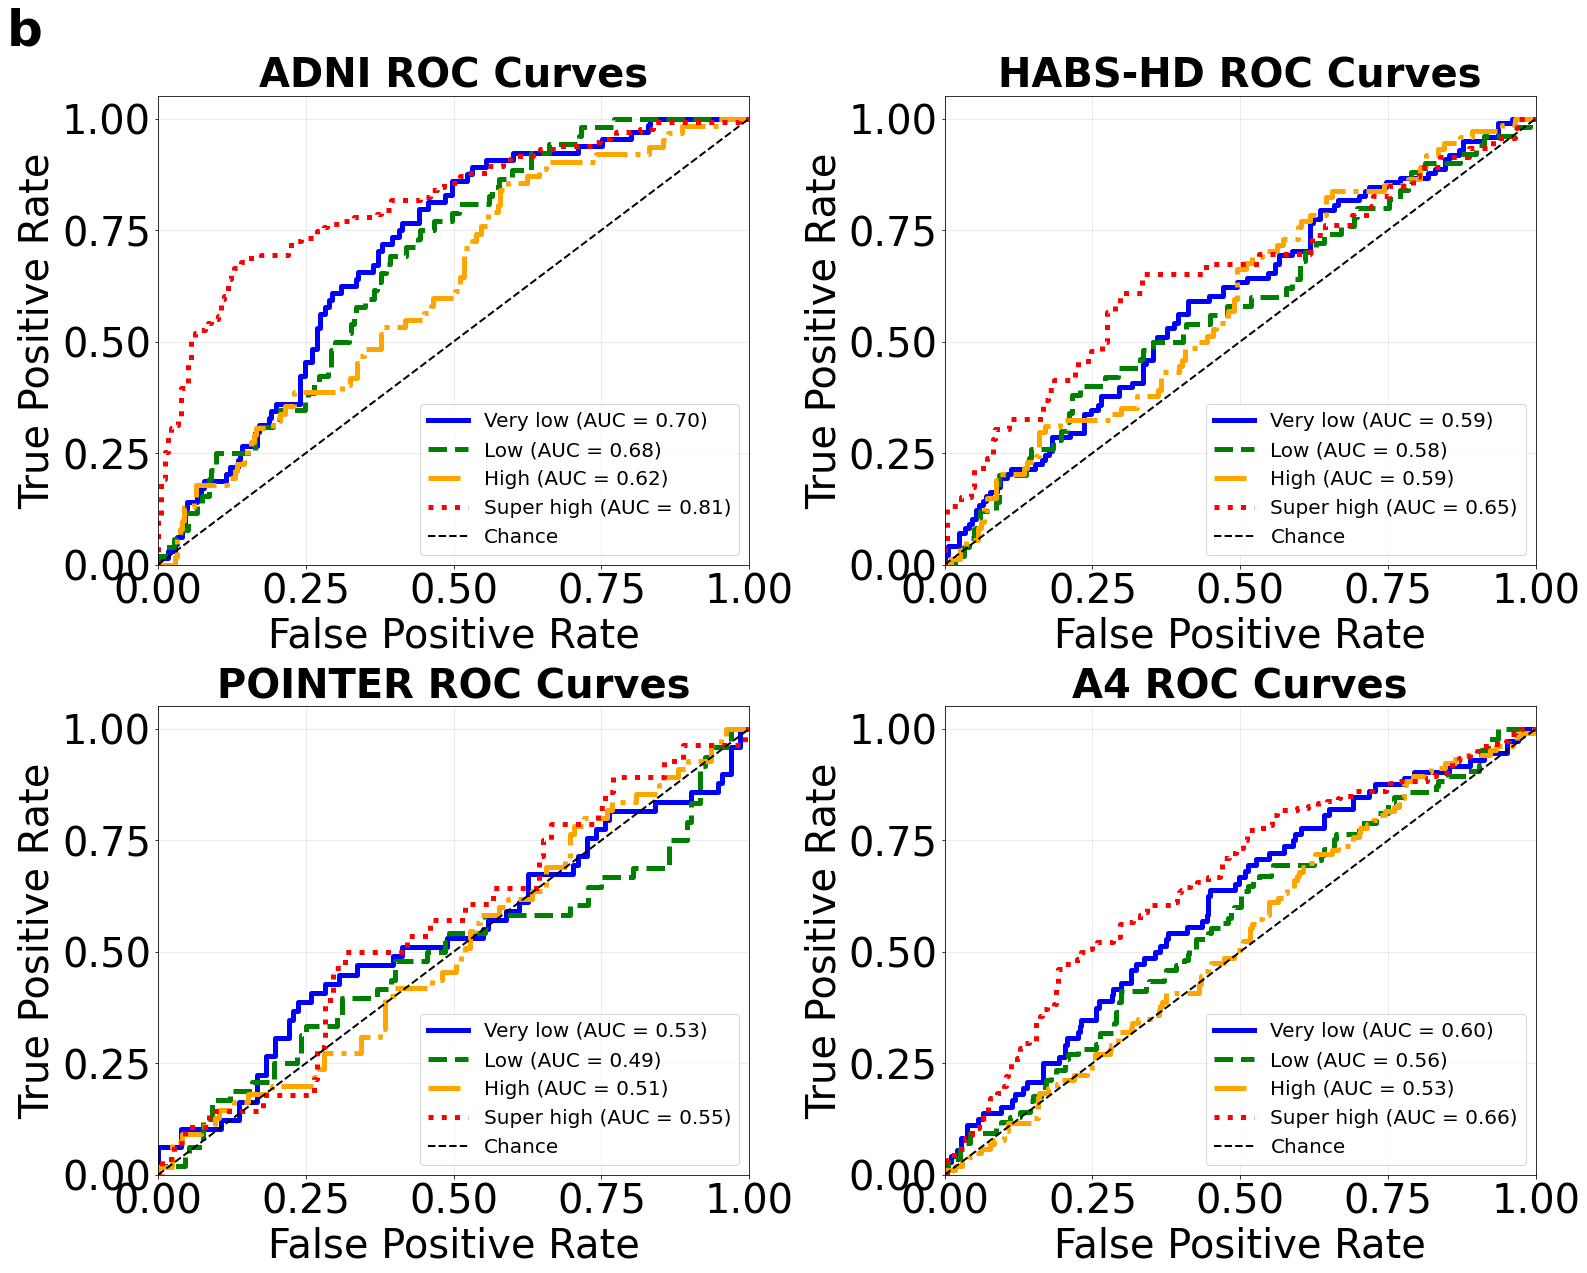

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd

# Define file paths for each cohort
file_paths = {
    "ADNI": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI-results\\ADNI_probability_meta_tau.csv",
    "HABS-HD": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_meta_tau.csv",
    "POINTER": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\POINTER-results\\POINTER_probability_meta_tau.csv",
    "A4": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\A4-results\\A4_probability_meta_tau.csv"
}



# Define the classes
classes = ['Meta Tau-Very low', 'Meta Tau-Low', 'Meta Tau-High','Meta Tau-Super high']

# Colors and line styles for classes
class_colors = ['blue', 'green', 'orange', 'red',"gray"]
line_styles = ['-', '--', '-.', ':', '-']

# Initialize the subplots
fig, axes = plt.subplots(2, 2, figsize=(22, 18))
axes = axes.flatten()

# Process each cohort
for cohort_idx, (cohort_name, file_path) in enumerate(file_paths.items()):
    ax = axes[cohort_idx]
    
    # Load the dataset
    data = pd.read_csv(file_path)
    data=data[data["Truth"]!="Unknown."]
    # Extract true labels and probabilities
    true_labels = data['Truth']
    class_probs = data[ ['Meta Tau-Very low', 'Meta Tau-Low', 'Meta Tau-High','Meta Tau-Super high']]
    
    # Binarize the true labels for one-vs-all classification
    true_labels_binarized = label_binarize(true_labels, classes=['Very low', 'Low', 'High','Super high'])
    
    # Compute ROC curve and AUC for each class
    for i, class_name in enumerate(['Very low', 'Low', 'High','Super high']):
        fpr, tpr, _ = roc_curve(true_labels_binarized[:, i], class_probs[classes[i]])
        roc_auc = auc(fpr, tpr)
        # Plot ROC curve for the class
        ax.plot(
            fpr, tpr,
            label=f'{class_name} (AUC = {roc_auc:.2f})',
            color=class_colors[i],
            linestyle=line_styles[i],
            linewidth=5
        )
    
    # Plot diagonal line for chance
    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
    
    # Set subplot title and labels
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'{cohort_name} ROC Curves', fontsize=40, weight='bold')
    ax.set_xlabel('False Positive Rate', fontsize=40)
    ax.set_ylabel('True Positive Rate', fontsize=40)
    ax.legend(loc='lower right', fontsize=20)
    ax.grid(alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=40)
fig.text(0.0, 0.98, "b", fontsize=50, fontweight='bold', ha='left', va='top')
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\meta_tau_llm_roc.svg", format="svg")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\meta_tau_llm_roc.png", format="png")
plt.show()



## GB

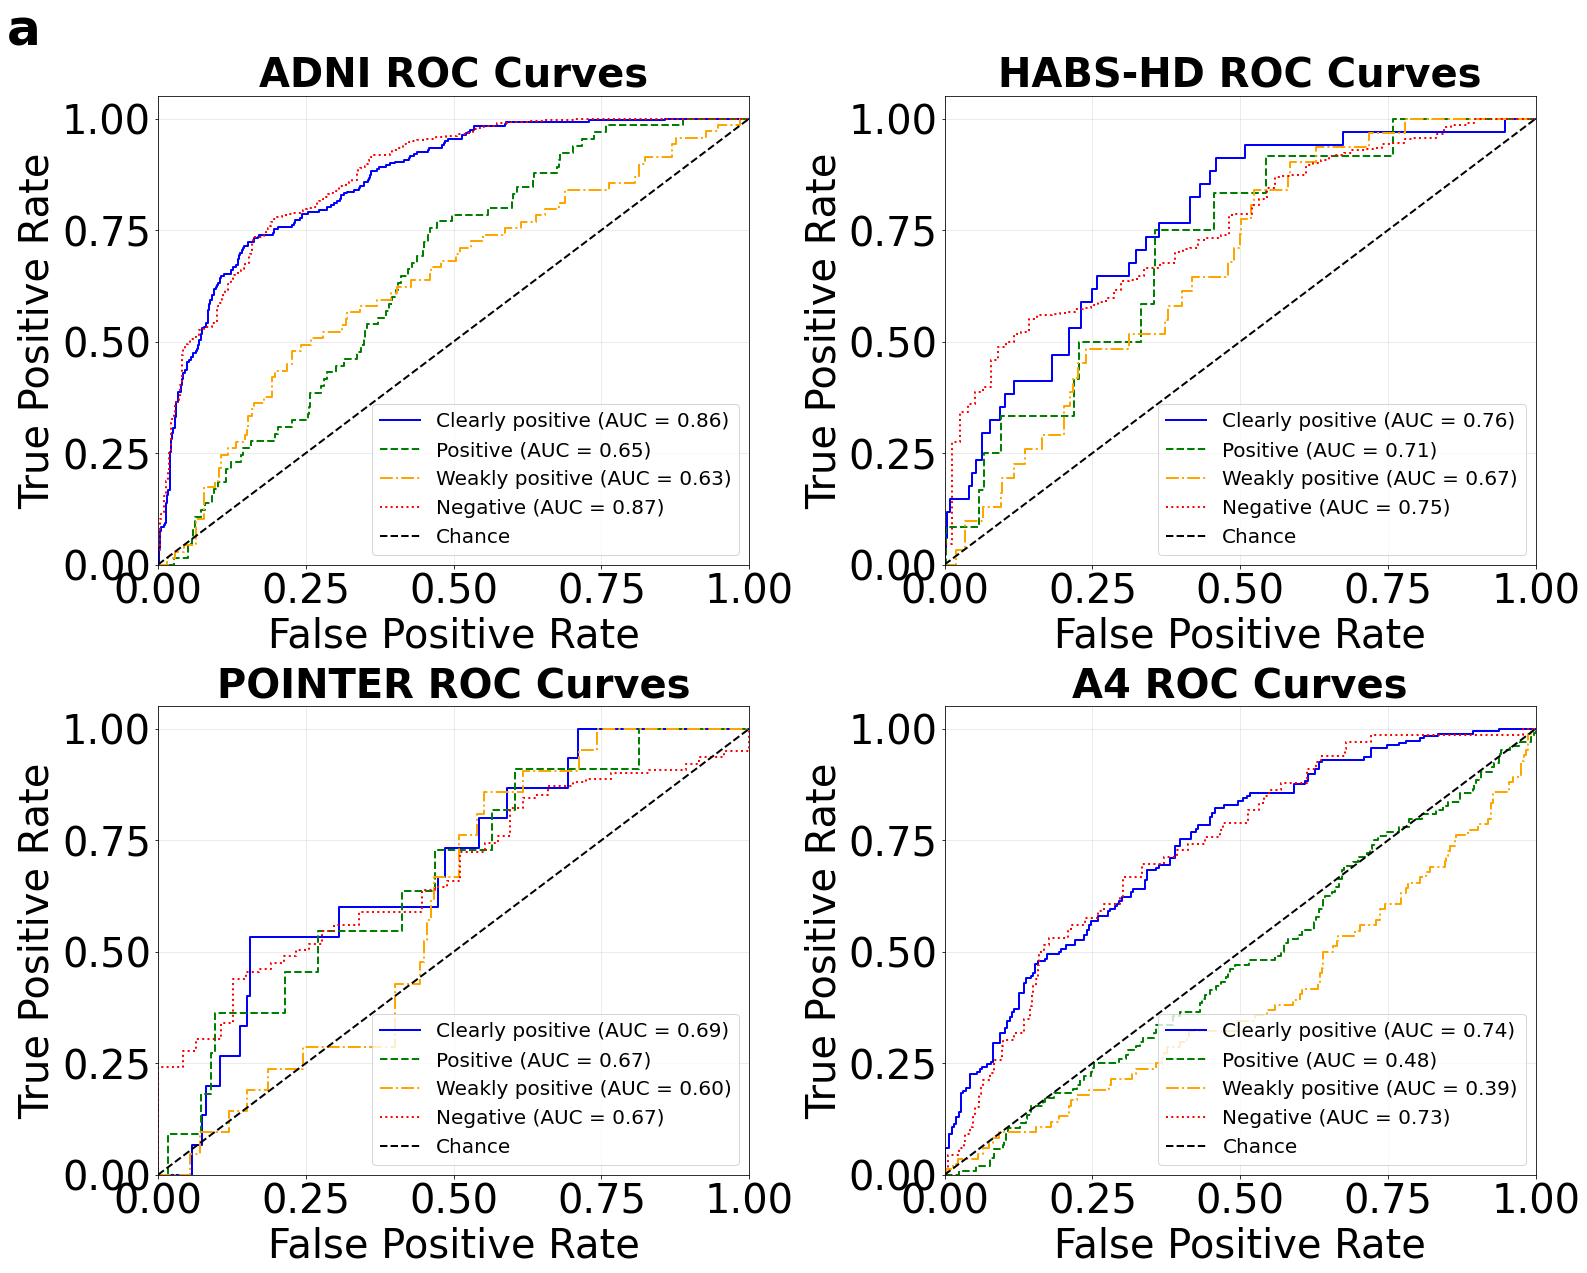

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd

# Define file paths for each cohort
file_paths = {
    "ADNI": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result.csv",
    "HABS-HD": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result.csv",
    "POINTER": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_testing_result.csv",
    "A4": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\GB\\A4_testing_result_abeta.csv"
}

# Define the classes
classes = ['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']

# Colors and line styles for classes
class_colors = ['blue', 'green', 'orange', 'red']
line_styles = ['-', '--', '-.', ':']

# Initialize the subplots
fig, axes = plt.subplots(2, 2, figsize=(22, 18))
axes = axes.flatten()

# Process each cohort
for cohort_idx, (cohort_name, file_path) in enumerate(file_paths.items()):
    ax = axes[cohort_idx]
    
    # Load the dataset
    data = pd.read_csv(file_path)
    
    # Extract true labels and probabilities
    true_labels = data['Truth']
    class_probs = data[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']]
    
    # Binarize the true labels for one-vs-all classification
    true_labels_binarized = label_binarize(true_labels, classes=classes)
    
    # Compute ROC curve and AUC for each class
    for i, class_name in enumerate(['Clearly positive',"Positive", 'Weakly positive','Negative']):
        fpr, tpr, _ = roc_curve(true_labels_binarized[:, i], class_probs[classes[i]])
        roc_auc = auc(fpr, tpr)
        # Plot ROC curve for the class
        ax.plot(
            fpr, tpr,
            label=f'{class_name} (AUC = {roc_auc:.2f})',
            color=class_colors[i],
            linestyle=line_styles[i],
            linewidth=2
        )
    
    # Plot diagonal line for chance
    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
    
    # Set subplot title and labels
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'{cohort_name} ROC Curves', fontsize=40, weight='bold')
    ax.set_xlabel('False Positive Rate', fontsize=40)
    ax.set_ylabel('True Positive Rate', fontsize=40)
    ax.legend(loc='lower right', fontsize=20)
    ax.grid(alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=40)
fig.text(0.0, 0.98, "a", fontsize=50, fontweight='bold', ha='left', va='top')
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\abeta_gb_roc.svg", format="svg")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\abeta_gb_roc.png", format="png")
plt.show()



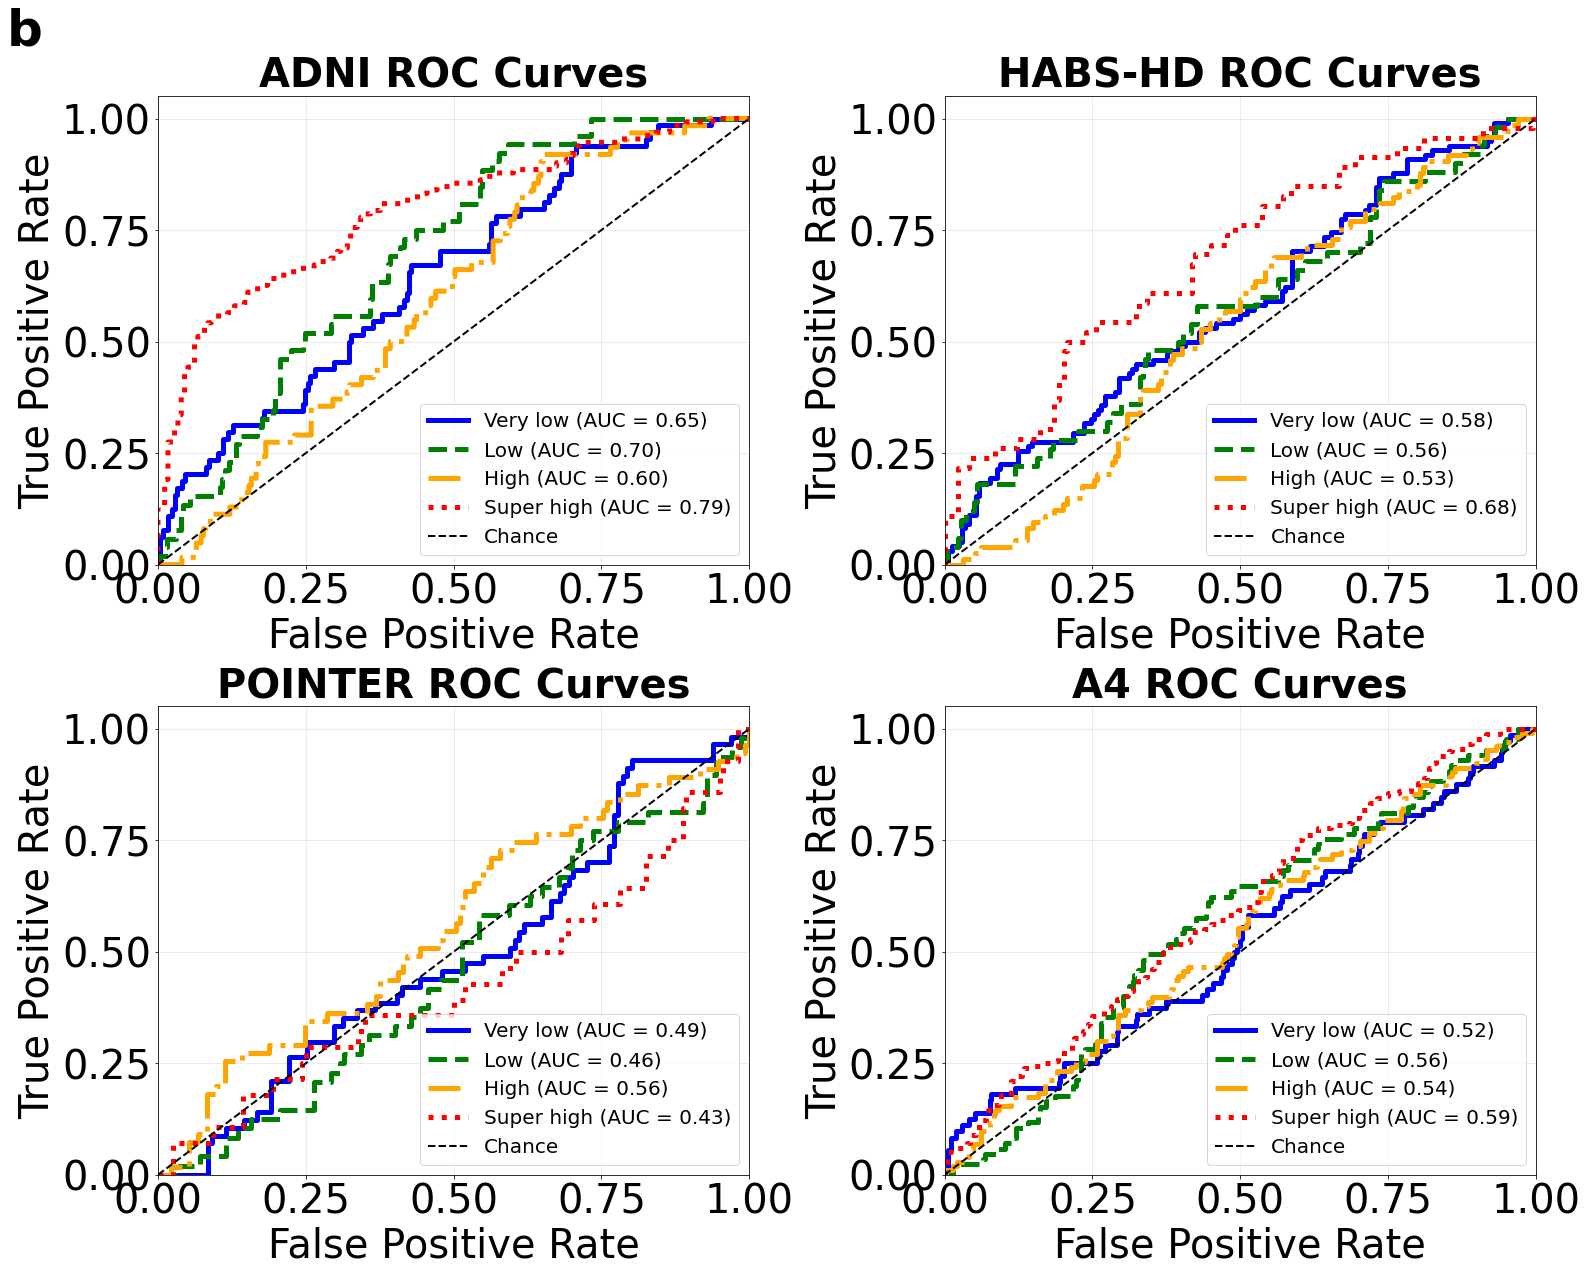

In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd

# Define file paths for each cohort
file_paths = {
   "ADNI": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_meta_tau.csv",
    "HABS-HD": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_meta_tau.csv",
    "POINTER": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_testing_result_meta_tau.csv",
    "A4": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\GB\\A4_testing_result_meta_tau.csv"
}



# Define the classes
classes = ['Very low', 'Low', 'High','Super high']

# Colors and line styles for classes
class_colors = ['blue', 'green', 'orange', 'red',"gray"]
line_styles = ['-', '--', '-.', ':', '-']

# Initialize the subplots
fig, axes = plt.subplots(2, 2, figsize=(22, 18))
axes = axes.flatten()

# Process each cohort
for cohort_idx, (cohort_name, file_path) in enumerate(file_paths.items()):
    ax = axes[cohort_idx]
    
    # Load the dataset
    data = pd.read_csv(file_path)
    data=data[data["Truth"]!="Unknown."]
    # Extract true labels and probabilities
    true_labels = data['Truth']
    class_probs = data[ ['Very low', 'Low', 'High','Super high']]
    
    # Binarize the true labels for one-vs-all classification
    true_labels_binarized = label_binarize(true_labels, classes=['Very low', 'Low', 'High','Super high'])
    
    # Compute ROC curve and AUC for each class
    for i, class_name in enumerate(['Very low', 'Low', 'High','Super high']):
        fpr, tpr, _ = roc_curve(true_labels_binarized[:, i], class_probs[classes[i]])
        roc_auc = auc(fpr, tpr)
        # Plot ROC curve for the class
        ax.plot(
            fpr, tpr,
            label=f'{class_name} (AUC = {roc_auc:.2f})',
            color=class_colors[i],
            linestyle=line_styles[i],
            linewidth=5
        )
    
    # Plot diagonal line for chance
    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
    
    # Set subplot title and labels
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'{cohort_name} ROC Curves', fontsize=40, weight='bold')
    ax.set_xlabel('False Positive Rate', fontsize=40)
    ax.set_ylabel('True Positive Rate', fontsize=40)
    ax.legend(loc='lower right', fontsize=20)
    ax.grid(alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=40)
fig.text(0.0, 0.98, "b", fontsize=50, fontweight='bold', ha='left', va='top')
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\meta_tau_gb_roc.svg", format="svg")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\meta_tau_gb_roc.png", format="png")
plt.show()



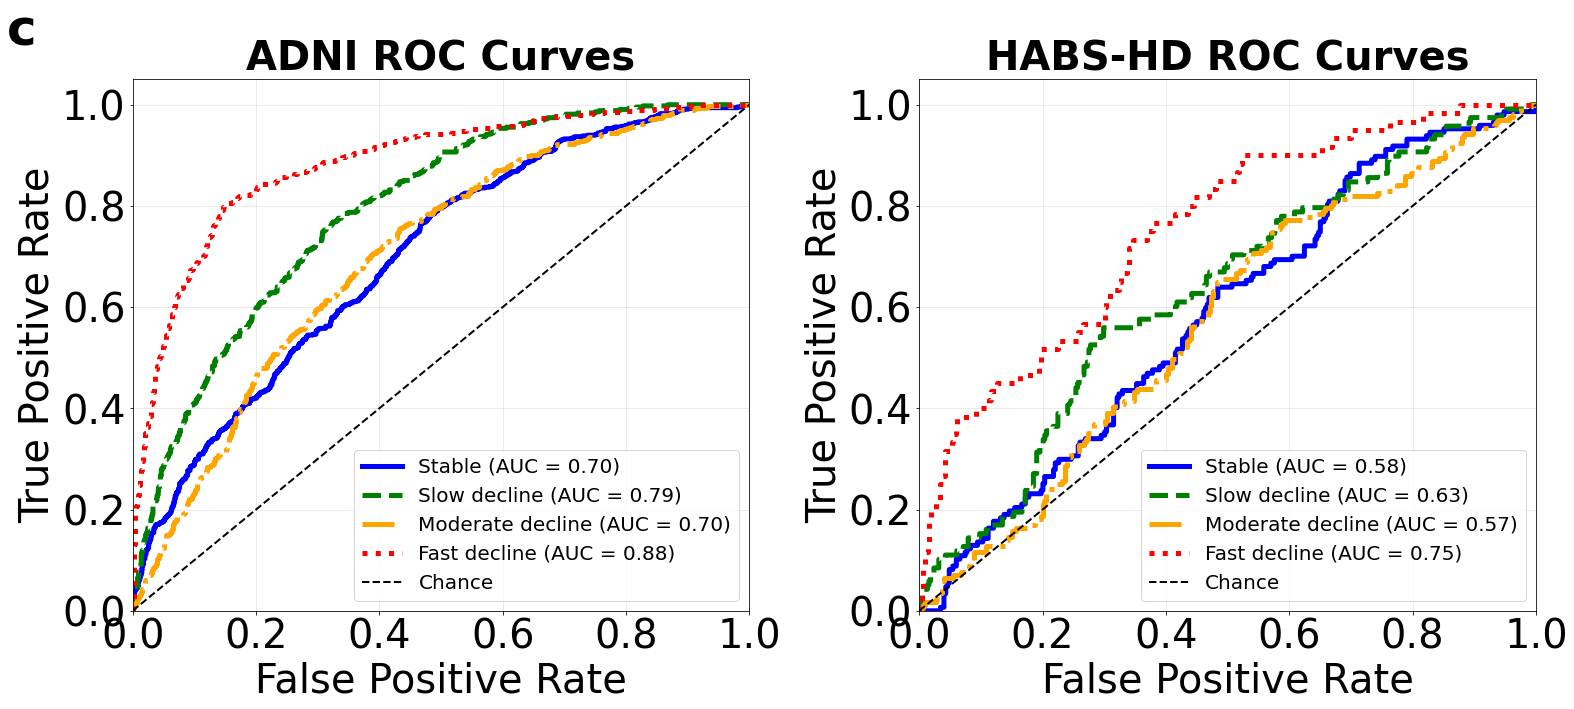

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd

# Define file paths for each cohort
file_paths = {
    "ADNI": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_mmse.csv",
    "HABS-HD": "D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_mmse.csv"
}

# Define the classes
classes = ["Zero","Slow","Moderate","Fast"]


# Colors and line styles for classes
class_colors = ['blue', 'green', 'orange', 'red']
line_styles = ['-', '--', '-.', ':']

# Initialize the subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
axes = axes.flatten()

# Process each cohort
for cohort_idx, (cohort_name, file_path) in enumerate(file_paths.items()):
    ax = axes[cohort_idx]
    
    # Load the dataset
    data = pd.read_csv(file_path)
    data=data[data["Truth"]!="Unknown."]
    # Extract true labels and probabilities
    true_labels = data['Truth']
    class_probs = data[["Zero","Slow","Moderate","Fast"]]
    
    # Binarize the true labels for one-vs-all classification
    true_labels_binarized = label_binarize(true_labels, classes=["Zero","Slow","Moderate","Fast"])
    
    # Compute ROC curve and AUC for each class
    for i, class_name in enumerate(["Stable","Slow decline","Moderate decline","Fast decline"]):
        fpr, tpr, _ = roc_curve(true_labels_binarized[:, i], class_probs[classes[i]])
        roc_auc = auc(fpr, tpr)
        # Plot ROC curve for the class
        ax.plot(
            fpr, tpr,
            label=f'{class_name} (AUC = {roc_auc:.2f})',
            color=class_colors[i],
            linestyle=line_styles[i],
            linewidth=5
        )
    
    # Plot diagonal line for chance
    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
    
    # Set subplot title and labels
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'{cohort_name} ROC Curves', fontsize=40, weight='bold')
    ax.set_xlabel('False Positive Rate', fontsize=40)
    ax.set_ylabel('True Positive Rate', fontsize=40)
    ax.legend(loc='lower right', fontsize=20)
    ax.grid(alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=40)
fig.text(0.0, 0.98, "c", fontsize=50, fontweight='bold', ha='left', va='top')
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\mmse_gb_roc.svg", format="svg")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\mmse_gb_roc.png", format="png")
plt.show()

